DATA MINING W2

Kevin William Faith/0706022310026

# DATA PREPROCESSING

In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download the CSV file from the URL
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/jabodetabek_house_price.csv"
df = pd.read_csv(url)

df.head()

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,...,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,...,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,...,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,...,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,...,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   3553 non-null   object 
 1   price_in_rp           3553 non-null   float64
 2   title                 3553 non-null   object 
 3   address               3553 non-null   object 
 4   district              3553 non-null   object 
 5   city                  3553 non-null   object 
 6   lat                   3553 non-null   float64
 7   long                  3553 non-null   float64
 8   facilities            3553 non-null   object 
 9   property_type         3552 non-null   object 
 10  ads_id                3549 non-null   object 
 11  bedrooms              3519 non-null   float64
 12  bathrooms             3524 non-null   float64
 13  land_size_m2          3551 non-null   float64
 14  building_size_m2      3551 non-null   float64
 15  carports             

In [290]:
df.describe()

,price_in_rp,lat,long,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,garages
count,3.553000e+03,3553.000000,3553.000000,3519.000000,3524.000000,3551.000000,3551.000000,3553.000000,3553.000000,3553.000000,3547.000000,2108.000000,2108.000000,3553.000000
mean,4.191685e+09,-6.324721,106.792881,3.326513,2.624858,204.806815,186.587440,1.197861,0.496482,0.370391,1.764590,3.880930,2018.137097,0.708978
std,1.375067e+10,0.129245,0.172159,2.672148,2.696497,402.127746,248.443471,1.114996,0.685723,0.536024,0.637349,7.603708,7.641448,1.311879
min,4.200000e+07,-6.894828,106.402315,1.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1870.000000,0.000000
25%,8.000000e+08,-6.397933,106.687295,2.000000,2.000000,75.000000,65.500000,1.000000,0.000000,0.000000,1.000000,0.000000,2016.000000,0.000000
50%,1.500000e+09,-6.300733,106.799954,3.000000,2.000000,108.000000,112.000000,1.000000,0.000000,0.000000,2.000000,1.000000,2021.000000,0.000000
75%,3.590000e+09,-6.231754,106.874766,4.000000,3.000000,192.000000,208.000000,2.000000,1.000000,1.000000,2.000000,6.000000,2022.000000,1.000000
max,5.800000e+11,-6.102478,109.771691,99.000000,99.000000,8000.000000,6000.000000,15.000000,7.000000,5.000000,5.000000,152.000000,2052.000000,50.000000


## Key Findings

### 1. Harga Rumah (price_in_rp)

* Rentang harga sangat ekstrem: mulai dari Rp 42 juta hingga Rp 580 miliar.
* Median (50%): sekitar Rp 1,5 miliar, artinya separuh iklan memiliki harga di bawah angka ini.
* Rata-rata Rp 4,19 miliar jauh lebih tinggi dibanding median. Ini menunjukkan distribusi miring ke kanan (beberapa rumah sangat mahal menarik rata-rata ke atas).
* Outlier: harga di atas Rp 100 miliar kemungkinan besar error input atau data tidak valid.



### 2. Lokasi (lat/long)

* Seluruh properti berada pada rentang -6,89 sampai -6,10 (latitude) dan 106,4 sampai 109,7 (longitude) → sesuai dengan wilayah Jabodetabek (Jakarta, Bogor, Depok, Tangerang, Bekasi).
* Tidak ada data hilang, konsisten.



### 3. Jumlah Kamar Tidur & Kamar Mandi

* Median: 3 kamar tidur, 2 kamar mandi.
* Nilai maksimum: 99 kamar tidur & 99 kamar mandi yang jelas tidak realistis.
* Rentang umum (25%–75%): 2–4 kamar tidur, 2–3 kamar mandi.


### 4. Luas Tanah & Bangunan

* Median luas tanah: 108 m²; median luas bangunan: 112 m².
* Rentang umum:

  * Tanah: 75–192 m²
  * Bangunan: 65–208 m²
* Outlier: luas tanah 8.000 m², bangunan 6.000 m²


### 5. **Carport & Garasi**

* Median carport: 1.
* Sebagian besar rumah memiliki 0–2 carport dan 0–1 garasi.
* Outlier: hingga 15 carport dan 50 garasi yang sangat tidak realistis untuk rumah biasa.



### 6. **Kamar & Kamar Mandi Asisten Rumah Tangga**

* Median: 0 (sebagian besar rumah tidak memiliki).
* Kuartil atas: beberapa rumah memiliki 1 kamar/kamar mandi ART.
* Outlier: hingga 7 kamar ART dan 5 kamar mandi ART (kemungkinan rumah mewah atau data salah).



### 7. **Jumlah Lantai**

* Median: 2 lantai.
* Rentang: 1–5 lantai.
* Masih dalam batas wajar.



### 8. **Usia Bangunan & Tahun Dibangun**

* Usia bangunan:

  * Median: 1 tahun → banyak rumah baru.
  * Maksimal: 152 tahun → tidak realistis di Jabodetabek.

* Tahun dibangun:

  * Median: 2021 → konsisten dengan tren rumah baru.
  * Minimum: 1870 (!), Maksimum: 2052 (tahun masa depan) → jelas error.



##  Kesimpulan Utama

1. Kualitas data bermasalah: terdapat banyak outlier (harga, kamar tidur, luas tanah/bangunan, garasi, usia bangunan) dan nilai yang tidak mungkin (misalnya tahun 2052).
2. Rumah tipikal di dataset: harga sekitar Rp 1,5 m , memiliki 3 kamar tidur, 2 kamar mandi, luas tanah 108 m², luas bangunan 112 m², 2 lantai, dan 1 carport.
3. Distribusi pasar: mayoritas adalah rumah baru, dengan sebagian kecil properti mewah berukuran sangat besar yang menyebabkan data menjadi tidak seimbang.

In [291]:
# Calculate null values and percentage
null_counts = df.isnull().sum()
null_percentages = (null_counts / len(df)) * 100

# Create a DataFrame for columns with null values
null_df = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percentages})

# Filter for columns with null values
null_df = null_df[null_df['Null Count'] > 0]


# Format the percentage with two decimal places and % symbol
null_df['Null Percentage'] = null_df['Null Percentage'].map('{:.2f}%'.format)


null_df

,Null Count,Null Percentage
property_type,1,0.03%
ads_id,4,0.11%
bedrooms,34,0.96%
bathrooms,29,0.82%
land_size_m2,2,0.06%
building_size_m2,2,0.06%
certificate,141,3.97%
floors,6,0.17%
building_age,1445,40.67%
year_built,1445,40.67%


In [292]:
# Display unique values for each column
for col in df.columns:
  print(f"Unique values for column '{col}':")
  print(df[col].unique())
  print("-" * 20)

Unique values for column 'url':
['https://www.rumah123.com/properti/bekasi/hos11360272/#qid~213b5619-a399-47b3-bfcf-faaef6b542d5'
 'https://www.rumah123.com/properti/bekasi/hos10680347/#qid~748f5d2d-8d3a-4a4e-a1b4-37c7be7ffc25'
 'https://www.rumah123.com/properti/bekasi/hos10685867/#qid~f6c2cf9d-44fa-4c1a-8749-8ee96b116e93'
 ...
 'https://www.rumah123.com/properti/tangerang/hos11359594/#qid~0d9492e8-7326-465d-85ee-e54559fedc26'
 'https://www.rumah123.com/properti/tangerang/hos11359313/#qid~5d5b05f9-ab0d-4774-ae61-bddd6e38b7f0'
 'https://www.rumah123.com/properti/tangerang/hos11358964/#qid~5d5b05f9-ab0d-4774-ae61-bddd6e38b7f0']
--------------------
Unique values for column 'price_in_rp':
[2.99e+09 1.27e+09 1.95e+09 3.30e+09 4.50e+09 2.70e+09 2.35e+09 2.90e+09
 2.55e+09 9.52e+08 1.80e+09 2.50e+09 5.36e+09 2.25e+09 2.45e+09 1.25e+08
 1.98e+09 7.64e+08 2.00e+09 4.80e+08 1.90e+09 3.00e+08 5.27e+09 2.80e+09
 2.71e+09 5.00e+08 4.39e+08 8.00e+08 8.50e+08 7.00e+08 4.95e+09 1.30e+09
 1.20e+09 2.

Key Issues:

- Text yang tidak konsisten seperti Caps yang tidak konsisten dan spasi yang tidak sesuai

- Data yang tidak sesuai: seperti kolom electricity "4400 mah" / "lainnya mah"

- Crazy values: bedrooms/bathrooms up to 99, price_in_rp up to 5.8e11, building_size_m2==1, etc.

- Date logic: year_built (misal 2052, 1870) dan building_age (misal 121, 152) inconsistent.

- Sparsity: building_orientation 46% missing; building_age/year_built 40% missing.

Disini saya akan drop kolom yaitu:

1. url

Alasan: Hanya berfungsi sebagai referensi eksternal, tidak relevan untuk analisis harga atau karakteristik rumah.

2. title

Alasan: teks bebas, panjang, penuh kata sifat yang tidak konsisten antar penjual (misal: “cantik”, “asri”, “mewah”). Title juga tidak informatif secara kuantitatif

3. address

Alasan: kita sudah punya city, district, lat, dan long yang lebih terstruktur untuk lokasi. Alamat panjang juga isinya tidak konsisten dan beragam yang alhasil akan membuat banyak noise.

4. ads_id

Alasan: tidak memberikan informasi tambahan untuk analisis, hanya identifier.

5. building_orientation

Alasan: tidak memberikan informasi tambahan untuk analisis dan banyak missing values

6. year_built

Alasan: banyak data yang anomali

In [293]:
drop_cols = ["url", "title", "address", "ads_id", "building_orientation", "year_built"]
df = df.drop(columns=drop_cols, errors="ignore")
df.head()

,price_in_rp,district,city,lat,long,facilities,property_type,bedrooms,bathrooms,land_size_m2,...,carports,certificate,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,property_condition,garages,furnishing
0,2.990000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,4.0,4.0,239.0,...,0.0,shm - sertifikat hak milik,4400 mah,0.0,1.0,2.0,5.0,bagus,0.0,unfurnished
1,1.270000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,3.0,2.0,55.0,...,1.0,hgb - hak guna bangunan,2200 mah,0.0,0.0,2.0,NaN,bagus,0.0,NaN
2,1.950000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,3.0,3.0,119.0,...,1.0,hgb - hak guna bangunan,2200 mah,1.0,1.0,2.0,NaN,bagus,1.0,unfurnished
3,3.300000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,3.0,3.0,180.0,...,0.0,shm - sertifikat hak milik,3500 mah,1.0,1.0,2.0,6.0,bagus sekali,2.0,unfurnished
4,4.500000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,4.0,3.0,328.0,...,2.0,shm - sertifikat hak milik,3500 mah,1.0,1.0,2.0,9.0,bagus,1.0,unfurnished


In [294]:
# HANDLE MISSING VALUES

# trim/standarisasi data kategorikal
def normcat(s):
    return s.astype("string").str.strip().str.lower()

for col in ["city","district","certificate","property_condition","furnishing","property_type"]:
    if col in df.columns:
        df[col] = normcat(df[col])

# menghilangkan spasi di awal
df["city"] = df["city"].str.replace(r"^\s+","", regex=True)

# ngebin kolom sertifikat
cert_map = {
    "shm - sertifikat hak milik":"shm",
    "hgb - hak guna bangunan":"hgb",
    "hp - hak pakai":"hp",
    "lainnya (ppjb,girik,adat,dll)":"lainnya"
}
df["certificate"] = df["certificate"].map(cert_map).fillna(df["certificate"])

# mengubah kolom electricity menjadi numerik, menghilangkan "mah" dan mengubah data non numerik menjadi NaN
def parse_electricity(x):
    if pd.isna(x): return np.nan
    s = str(x).lower().strip().replace(" mah","")
    return pd.to_numeric(s, errors="coerce")
df["electricity"] = df["electricity"].apply(parse_electricity)

# mengubah data building age yang kosong menjadi null karena khusus kolom ini missing valuesnya akan ku handle saat feature engineering

def clean_building_age(x):
    if pd.isna(x): return np.nan
    try:
        return int(x)
    except ValueError:
        return np.nan

if "building_age" in df.columns:
    df["building_age"] = df["building_age"].apply(clean_building_age)

# menukar isi data yang ketukar di kolom furnishing dan property condition
switch = df["property_condition"].isin(["semi furnished", "unfurnished"])

# simpan nilai yang salah
temp = df.loc[switch, "property_condition"]

# tukar isi property_condition dengan furnishing
df.loc[switch, "property_condition"] = df.loc[switch, "furnishing"]

# isi furnishing dengan nilai yang tadinya salah
df.loc[switch, "furnishing"] = temp

# disini saya akan melakukan imputasi dimana data numerik yang kosong akan diisi dengan median dan kategorikal dengan modus

# Alasan:
# Numerik diubah median karena aman dari pengaruh outlier, lebih cocok untuk data seperti harga rumah, luas tanah
# Kategorikal diubah mode karena logis karena kategori itu diskrit, jadi diisi dengan kelas yang paling mungkin
# Dengan ini dataset tetap utuh, tidak bias oleh outlier, dan siap dipakai untuk analisis

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c != "building_age"]
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

for c in cat_cols:
    mode = df[c].mode(dropna=True)
    if len(mode):
        df[c] = df[c].fillna(mode.iloc[0])

In [295]:
df.head()

,price_in_rp,district,city,lat,long,facilities,property_type,bedrooms,bathrooms,land_size_m2,...,carports,certificate,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,property_condition,garages,furnishing
0,2.990000e+09,summarecon bekasi,bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,4.0,4.0,239.0,...,0.0,shm,4400.0,0.0,1.0,2.0,5.0,bagus,0.0,unfurnished
1,1.270000e+09,summarecon bekasi,bekasi,-6.223945,106.986275,Taman,rumah,3.0,2.0,55.0,...,1.0,hgb,2200.0,0.0,0.0,2.0,NaN,bagus,0.0,unfurnished
2,1.950000e+09,summarecon bekasi,bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,3.0,3.0,119.0,...,1.0,hgb,2200.0,1.0,1.0,2.0,NaN,bagus,1.0,unfurnished
3,3.300000e+09,summarecon bekasi,bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,3.0,3.0,180.0,...,0.0,shm,3500.0,1.0,1.0,2.0,6.0,bagus sekali,2.0,unfurnished
4,4.500000e+09,summarecon bekasi,bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,4.0,3.0,328.0,...,2.0,shm,3500.0,1.0,1.0,2.0,9.0,bagus,1.0,unfurnished


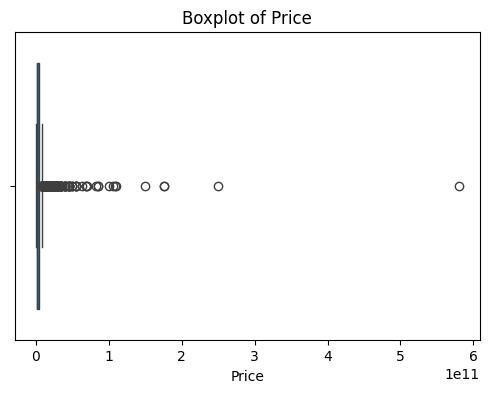

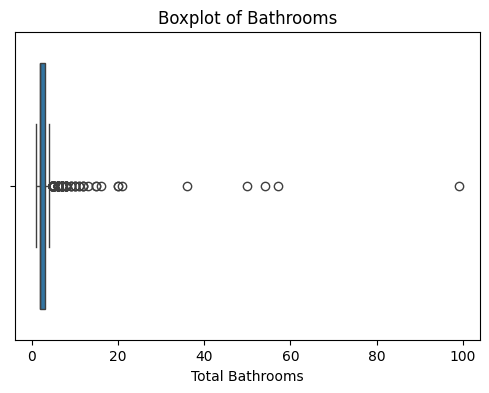

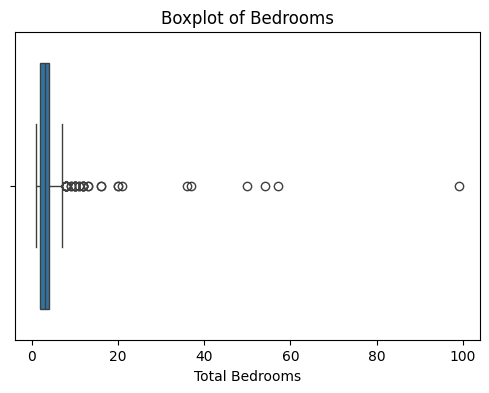

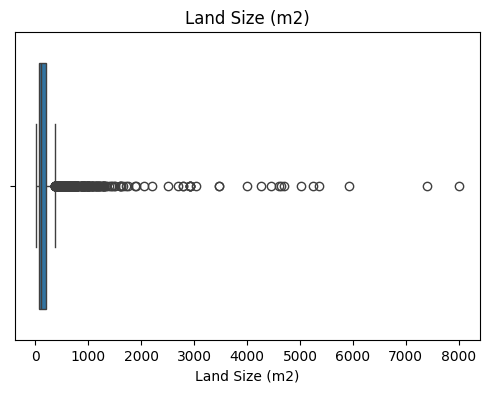

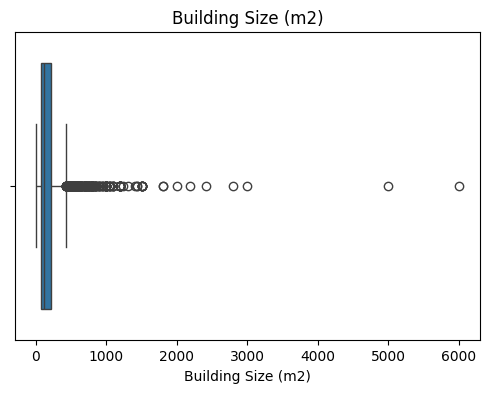

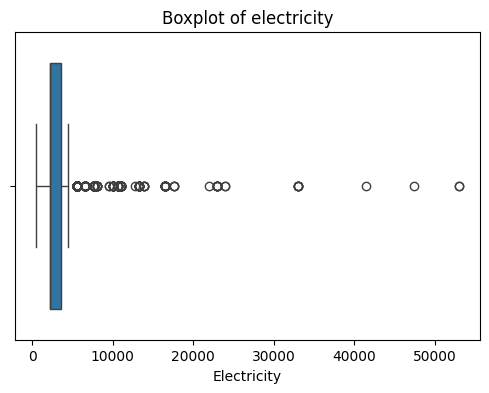

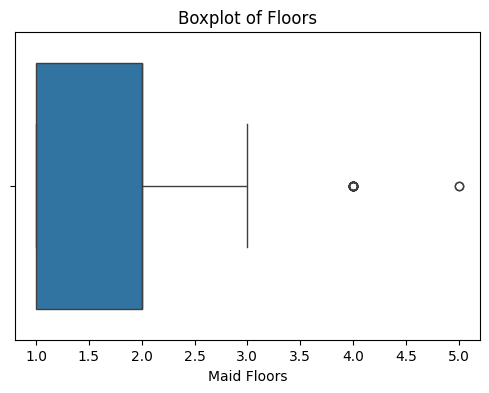

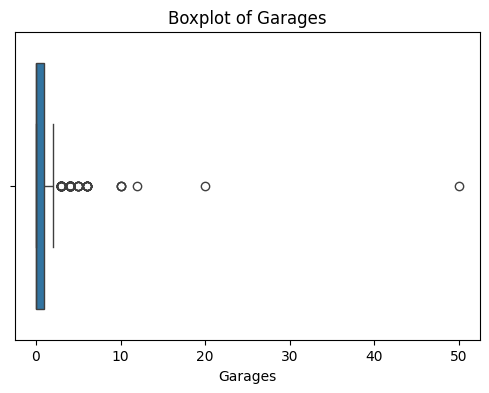

In [296]:
# Boxplot for 'Price'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['price_in_rp'])
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

# Boxplot for 'Bathrooms'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['bathrooms'])
plt.title('Boxplot of Bathrooms')
plt.xlabel('Total Bathrooms')
plt.show()

# Boxplot for 'Bedrooms'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['bedrooms'])
plt.title('Boxplot of Bedrooms')
plt.xlabel('Total Bedrooms')
plt.show()

# Boxplot for 'Land Size'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['land_size_m2'])
plt.title('Land Size (m2)')
plt.xlabel('Land Size (m2)')
plt.show()

# Boxplot for 'Building Size'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['building_size_m2'])
plt.title('Building Size (m2)')
plt.xlabel('Building Size (m2)')
plt.show()


# Boxplot for 'Electricity'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['electricity'])
plt.title('Boxplot of electricity')
plt.xlabel('Electricity')
plt.show()


# Boxplot for 'Floors'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['floors'])
plt.title('Boxplot of Floors')
plt.xlabel('Maid Floors')
plt.show()


# Boxplot for 'Garages'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['garages'])
plt.title('Boxplot of Garages')
plt.xlabel('Garages')
plt.show()



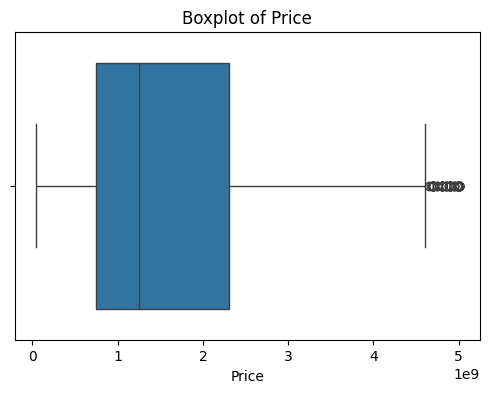

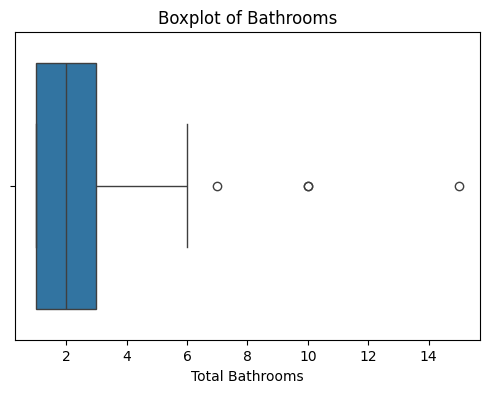

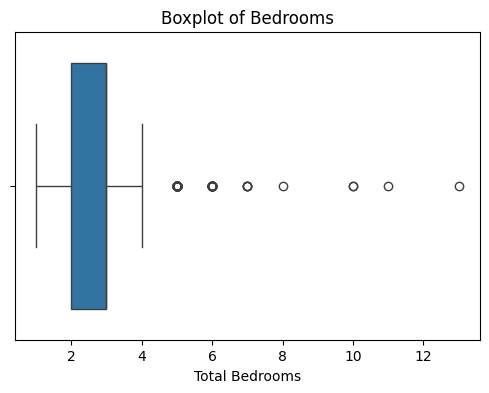

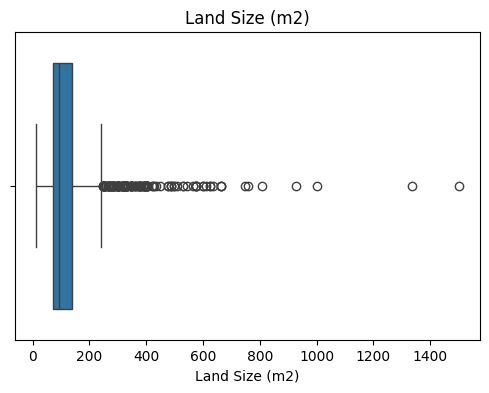

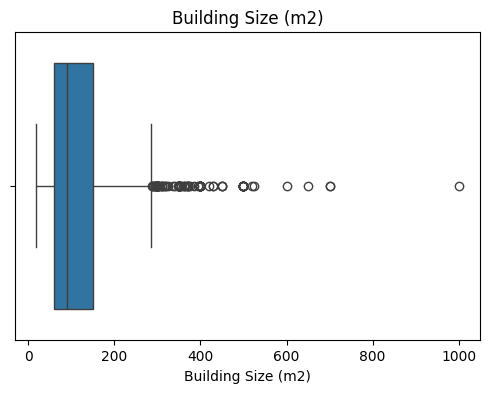

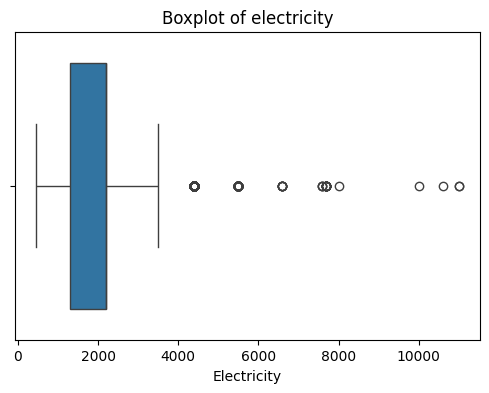

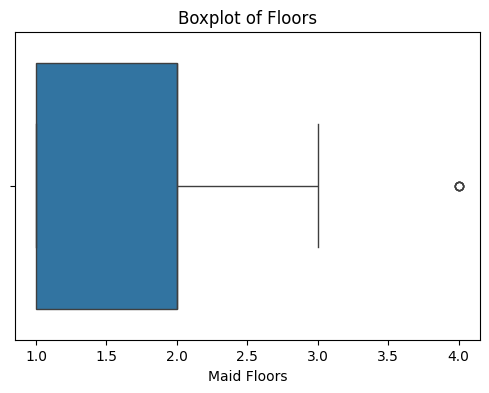

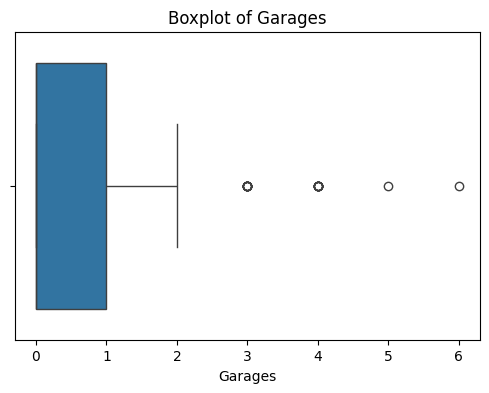

In [297]:
# Cut price outlier karena saya memilih harga rumah yang realistis dan jika lebih dari 5m datanya jauh semua
df = df[df['price_in_rp'] <= 5000000000]

# Cut Land size outlier karena diatas 1500 datanya jauh semua
df = df[df['land_size_m2'] <= 1500]

# Cut bedrooms outlier karena diatas 15 datanya jauh semua
df = df[df['bedrooms'] <= 15]

# Cut electricity outlier karena diatas 15000 datanya jauh semua
df = df[df['electricity'] <= 15000]

# Boxplot for 'Price'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['price_in_rp'])
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

# Boxplot for 'Bathrooms'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['bathrooms'])
plt.title('Boxplot of Bathrooms')
plt.xlabel('Total Bathrooms')
plt.show()

# Boxplot for 'Bedrooms'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['bedrooms'])
plt.title('Boxplot of Bedrooms')
plt.xlabel('Total Bedrooms')
plt.show()

# Boxplot for 'Land Size'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['land_size_m2'])
plt.title('Land Size (m2)')
plt.xlabel('Land Size (m2)')
plt.show()

# Boxplot for 'Building Size'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['building_size_m2'])
plt.title('Building Size (m2)')
plt.xlabel('Building Size (m2)')
plt.show()

# Boxplot for 'Electricity'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['electricity'])
plt.title('Boxplot of electricity')
plt.xlabel('Electricity')
plt.show()

# Boxplot for 'Floors'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['floors'])
plt.title('Boxplot of Floors')
plt.xlabel('Maid Floors')
plt.show()


# Boxplot for 'Building Age'
# plt.figure(figsize=(6, 4))
# sns.boxplot(x=df['building_age'])
# plt.title('Boxplot of Building Age')
# plt.xlabel('Building Age')
# plt.show()

# Boxplot for 'Garages'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['garages'])
plt.title('Boxplot of Garages')
plt.xlabel('Garages')
plt.show()

In [298]:
df["price_in_rp"].notna().sum()

np.int64(2950)

In [299]:
# Bin harga

# karena harga memiliki sebaran yang lebar dan bisa sangat dipengaruhi oleh outlier. Dengan mengelompokkan harga ke dalam tiga segmen, kita bisa:
# - Menangani outlier: Harga yang sangat tinggi atau sangat rendah bisa mempengaruhi analisis secara tidak proporsional.
# - Mempermudah analisis: Dengan membagi harga menjadi segmen-segmen, kita bisa menganalisis tren harga dalam segmen tertentu secara lebih mudah dan efektif.
# - Membantu pemodelan: Banyak model analitik yang lebih efektif dengan variabel kategorikal (seperti segmen harga) dibandingkan dengan variabel numerik kontinu.

# disini saya menggunakan qcut/ quantile cut. Dengan q=3 maka kode ini meminta ke pandas untuk membagi kolom harga menjadi 3 bagian dimana
# Bagian bawah (33% data termurah) jadic"affordable"
# Bagian tengah (33% berikutnya) jadi "mid"
# Bagian atas (33% termahal) jadi "luxury"
df["price_segment"] = pd.qcut(df["price_in_rp"], q=3, labels=["affordable", "mid", "luxury"])

# Bin age

# Usia bangunan merupakan fitur kontinu yang bisa sangat bervariasi. Dengan membaginya menjadi beberapa kelompok, kita bisa:
# - Menangani missing values: Jika ada nilai yang hilang pada usia bangunan, kita bisa mengklasifikasikannya dalam kategori "unknown" tanpa mengurangi kualitas analisis.
# - Menganalisis pengaruh usia

bins = [-0.01, 5, 10, 20, 50, np.inf]  #bin edges
labels = ["0-5", "6-10", "11-20", "21-50", "50+"]


# Apply binning to the building_age column
df["age_bucket"] = pd.cut(df["building_age"], bins=bins, labels=labels)

# Add 'unknown' to the categories before filling nulls
df["age_bucket"] = df["age_bucket"].cat.add_categories("unknown")

# For rows where building_age was originally NaN, we can assign a custom category like "unknown"
df["age_bucket"] = df["age_bucket"].fillna("unknown")


# Facilities count
# Fasilitas properti dapat bervariasi banyaknya dan jenisnya. Dengan menghitung jumlah fasilitas, kita bisa:
# - Menilai kelengkapan properti: Jumlah fasilitas sering kali berkorelasi dengan harga properti. Memiliki lebih banyak fasilitas bisa menunjukkan properti yang lebih bernilai.
# - Mengubah data ke dalam bentuk yang lebih mudah diolah: Menghitung jumlah fasilitas membuatnya lebih mudah dibandingkan dengan menggunakan deskripsi panjang tentang fasilitas di setiap baris.
# - Kita bisa melihat bahwa apakah semakin banyak fasilitas mempengaruhi harga atau tidak

def split_facilities(s):
    if pd.isna(s): return []
    return [p.strip().lower() for p in str(s).split(",") if p.strip()]

if "facilities" in df.columns:
    fac_lists = df["facilities"].apply(split_facilities)
    df["facilities_count"] = fac_lists.apply(len)

# Visualisasi Data

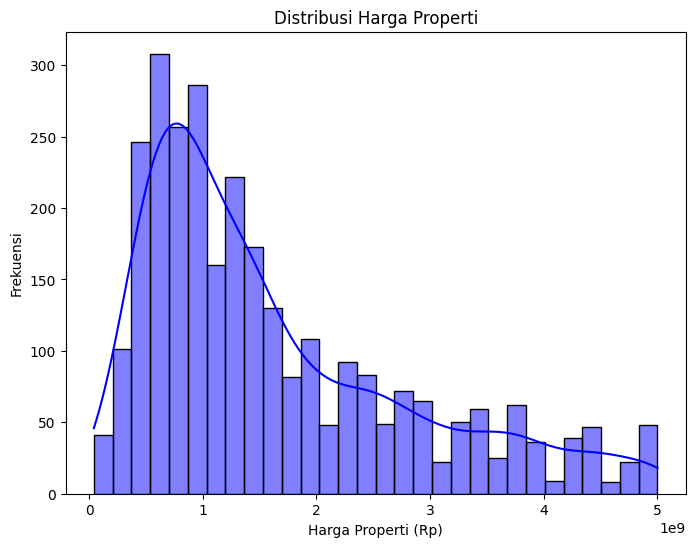

In [300]:
# Histogram for price distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['price_in_rp'], kde=True, color='blue', bins=30)
plt.title('Distribusi Harga Properti')
plt.xlabel('Harga Properti (Rp)')
plt.ylabel('Frekuensi')
plt.show()

KEY INSIGHT:

1. Distribusi Harga Properti Tidak Merata: Terlihat bahwa mayoritas harga properti berada pada rentang harga yang lebih rendah (di sekitar 1 m). Hal ini menunjukkan bahwa sebagian besar properti yang ada di dataset memiliki harga yang lebih terjangkau, dengan sebagian kecil yang memiliki harga sangat tinggi.

2. Skewed Distribution: Distribusi harga properti terlihat skewed to the right (positively skewed), dengan sebagian besar data terdistribusi di sisi kiri dan ekor panjang yang menyebar ke kanan. Ini menunjukkan adanya beberapa properti dengan harga sangat tinggi yang mungkin bisa dianggap sebagai outlier.

3. Konsentrasi di Rentang Harga Terendah: Ada konsentrasi yang lebih tinggi pada harga properti yang lebih rendah, yaitu antara 0 hingga 2 m, menunjukkan bahwa mayoritas properti yang ada di dataset lebih murah dan lebih terjangkau.

4. Jumlah Properti dengan Harga Tinggi Sangat Sedikit: Properti dengan harga lebih dari 4 m sangat jarang, yang dapat menunjukkan bahwa pasar properti untuk harga sangat tinggi memiliki volume yang lebih kecil.

Kesimpulan:

Secara keseluruhan, dapat disimpulkan bahwa mayoritas properti berada pada harga yang relatif terjangkau, namun ada beberapa properti mahal yang menjadi outlier di sisi harga tinggi.

/tmp/ipython-input-2066895262.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_segment', data=df, palette='viridis')


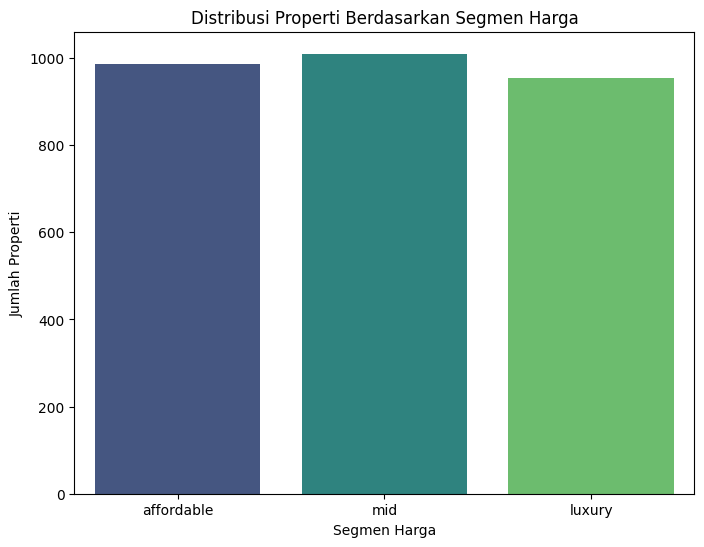

In [301]:
# Barplot for price segments
plt.figure(figsize=(8, 6))
sns.countplot(x='price_segment', data=df, palette='viridis')
plt.title('Distribusi Properti Berdasarkan Segmen Harga')
plt.xlabel('Segmen Harga')
plt.ylabel('Jumlah Properti')
plt.show()

###  Key Insight:

1. Distribusi hampir seimbang
   Jumlah properti di tiap segmen (affordable, mid, luxury) relatif seimbang, masing-masing sekitar 950–1.000 unit. Artinya, pasar properti di dataset ini tidak terlalu didominasi satu segmen saja.

2. Segmen Mid paling banyak
   Segmen mid (harga menengah) memiliki jumlah properti paling tinggi. Hal ini menunjukkan bahwa mayoritas developer atau penjual menargetkan pasar kelas menengah, yang biasanya paling besar di wilayah Jabodetabek.

3. Segmen Luxury cukup signifikan
   Meskipun jumlahnya sedikit lebih rendah, properti di segmen luxury tetap memiliki representasi yang cukup besar. Ini bisa menandakan adanya permintaan tinggi untuk properti kelas atas, misalnya di lokasi strategis seperti Jakarta Selatan, Jakarta Pusat, atau area premium di Tangerang/Bekasi.

4. Pasar Affordable masih kuat
   Properti affordable juga hampir sama banyaknya dengan segmen lain. Hal ini konsisten dengan kebutuhan masyarakat akan hunian terjangkau di area perkotaan.


Kesimpulan:

Pasar properti Jabodetabek terbagi rata ke tiga segmen utama (affordable, mid, luxury), dengan sedikit dominasi di segmen menengah. Ini menunjukkan bahwa developer menyesuaikan supply agar mencakup semua lapisan masyarakat: dari pembeli rumah pertama, keluarga kelas menengah, hingga investor kelas atas.



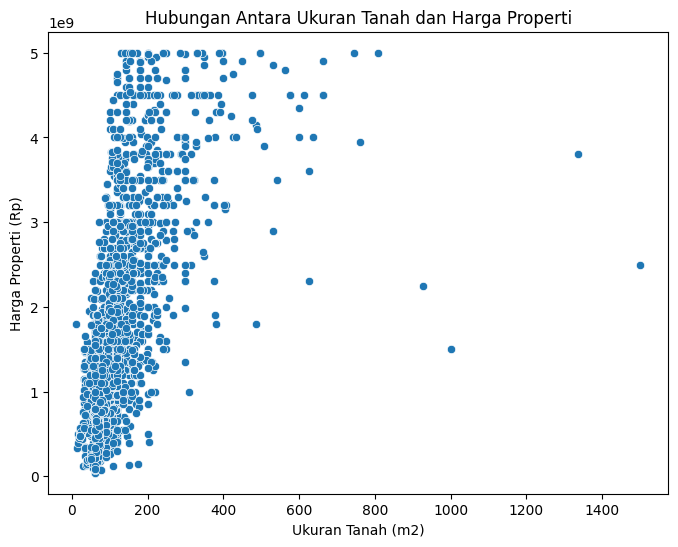

In [302]:
# Scatterplot for land size vs price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='land_size_m2', y='price_in_rp', data=df)
plt.title('Hubungan Antara Ukuran Tanah dan Harga Properti')
plt.xlabel('Ukuran Tanah (m2)')
plt.ylabel('Harga Properti (Rp)')
plt.show()

### Key Insight:

1. Korelasi positif tapi tidak kuat
   Secara umum, semakin besar ukuran tanah (land size), semakin tinggi harga properti. Namun, hubungan ini tidak linear sempurna — ada banyak properti dengan tanah kecil tapi harga tinggi (mungkin karena lokasi strategis).

2. Mayoritas properti berukuran kecil
   Sebagian besar data terkonsentrasi pada tanah < 200 m², menandakan bahwa rumah di Jabodetabek rata-rata memiliki ukuran tanah terbatas, sesuai dengan pola urban housing.

3. Outlier pada tanah besar
   Terdapat beberapa outlier dengan ukuran tanah sangat besar (≥ 1.000 m²), namun tidak selalu memiliki harga jauh lebih tinggi. Ini menunjukkan faktor harga tidak hanya ditentukan oleh luas tanah, tapi juga lokasi, bangunan, dan fasilitas.

4. Harga jenuh di level atas
   Banyak properti berkumpul di harga sekitar Rp 5 miliar, meskipun ukuran tanahnya berbeda. Artinya, ada batas psikologis/pasar tertentu di mana harga jarang melebihi titik tersebut.


Kesimpulan:

Luas tanah memang memengaruhi harga, tapi faktor lokasi, fasilitas, dan bangunan lebih dominan. Properti kecil di lokasi strategis bisa lebih mahal daripada tanah luas di pinggiran.

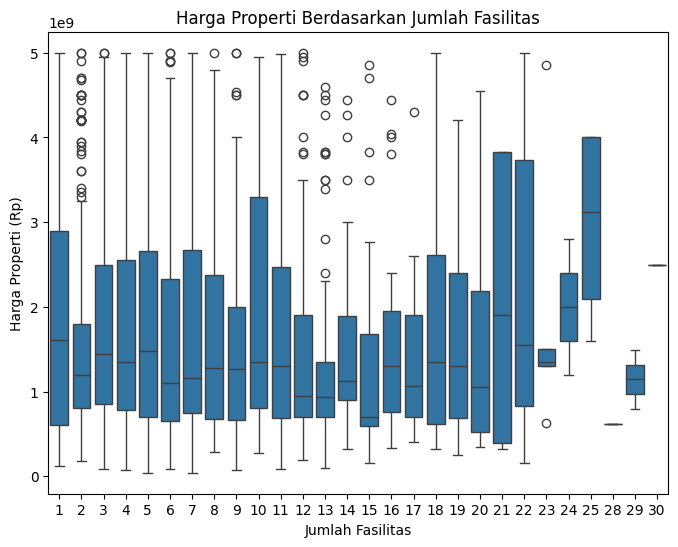

In [303]:
# Boxplot for price distribution based on number of facilities
plt.figure(figsize=(8, 6))
sns.boxplot(x='facilities_count', y='price_in_rp', data=df)
plt.title('Harga Properti Berdasarkan Jumlah Fasilitas')
plt.xlabel('Jumlah Fasilitas')
plt.ylabel('Harga Properti (Rp)')
plt.show()

KEY INSIGHT:

1. Hubungan Antara Harga dan Jumlah Fasilitas: Semakin banyak fasilitas yang ada pada properti, semakin tinggi harga rata-rata rumah tersebut. Properti dengan jumlah fasilitas lebih banyak cenderung memiliki rentang harga yang lebih besar, dan boxplot menunjukkan bahwa harga properti di kategori fasilitas lebih tinggi lebih bervariasi.

2. Outlier pada Fasilitas yang Banyak: Properti dengan jumlah fasilitas yang sangat tinggi (misalnya di atas 20) menunjukkan harga yang sangat tinggi, yang mengarah pada keberadaan properti mewah atau premium yang dilengkapi dengan fasilitas lengkap, tetapi juga menunjukkan outlier yang sangat besar pada harga.

3. Rentang Harga Properti: Boxplot ini menunjukkan bahwa banyak properti dengan jumlah fasilitas yang lebih sedikit cenderung memiliki harga yang lebih rendah, sementara properti dengan banyak fasilitas menunjukkan distribusi harga yang lebih tinggi dan lebih lebar.

4. Konsistensi Fasilitas: Meskipun jumlah fasilitas meningkat, harga tidak selalu secara konsisten meningkat pada setiap interval. Ada beberapa kelompok properti dengan fasilitas sedang (misalnya 10-15 fasilitas) yang memiliki harga yang lebih rendah, meskipun memiliki fasilitas lebih banyak daripada properti dengan harga lebih tinggi.

Kesimpulan:

Boxplot ini menunjukkan adanya hubungan positif antara jumlah fasilitas dan harga properti, namun dengan banyaknya outlier dan variasi harga yang lebih besar pada jumlah fasilitas yang lebih tinggi, yang mengindikasikan adanya properti yang sangat mahal dengan fasilitas mewah.


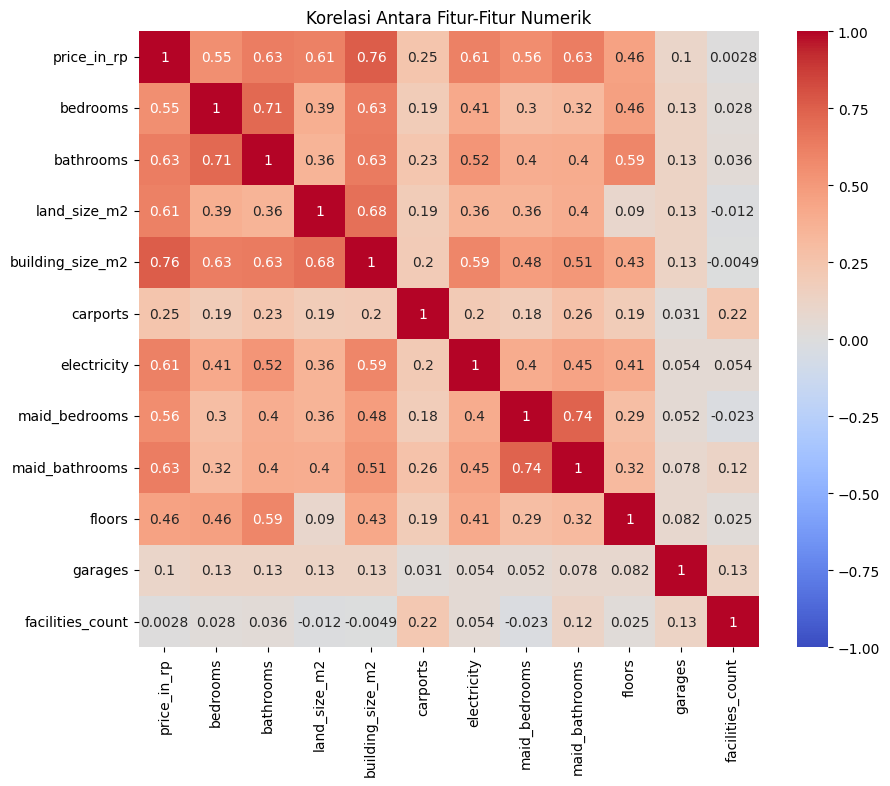

In [304]:
# Heatmap for correlation matrix
correlation_matrix = df[['price_in_rp','bedrooms', 'bathrooms', 'land_size_m2', 'building_size_m2', 'carports', 'electricity', 'maid_bedrooms', 'maid_bathrooms', 'floors', 'garages', 'facilities_count']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Korelasi Antara Fitur-Fitur Numerik')
plt.show()


### Key Insights:

1. Faktor paling berpengaruh pada harga properti

   * building_size_m2 memiliki korelasi paling tinggi dengan harga 0.76. Jadi ukuran bangunan adalah faktor utama yang menentukan harga rumah.
   * bathrooms 0.63, land_size_m2 0.61, dan electricity 0.61 juga punya korelasi cukup kuat maka semakin besar lahan, jumlah kamar mandi, serta daya listrik, harga cenderung lebih tinggi.

2. Kamar tidur vs kamar mandi

   * bedrooms dan bathrooms punya korelasi sangat kuat 0.71. Jumlah kamar tidur biasanya diikuti jumlah kamar mandi, sehingga keduanya saling melengkapi.

3. Fasilitas pembantu

   * maid_bedrooms dan maid_bathrooms punya korelasi kuat 0.74. Masuk akal karena rumah dengan kamar pembantu biasanya juga ada kamar mandi khusus pembantu.
   * Keduanya punya korelasi moderat dengan harga 0.56–0.63, artinya keberadaan fasilitas pembantu menambah nilai properti.

4. Fitur dengan pengaruh kecil

   * garages hampir tidak punya korelasi dengan harga 0.10. Keberadaan garasi bukan faktor utama penentu harga rumah di dataset ini.
   * carports juga rendah 0.25.

5. Floors jumlah lantai

   * Korelasinya dengan harga hanya 0.46, lebih rendah dari luas tanah atau bangunan. Ini menunjukkan jumlah lantai bukan faktor utama dibanding ukuran dan fasilitas.

6. Kuantitas fasilitas
  * Kuantitas fasilitas ternyata belum tentu mempengaruhi dengan data karena hubungannya kebanyakan tidak kuat


 Kesimpulan: Harga properti di Jabodetabek lebih banyak dipengaruhi oleh ukuran bangunan, luas tanah, jumlah kamar mandi, dan daya listrik, sedangkan jumlah fasilitas, garasi atau carport tidak terlalu memengaruhi harga.



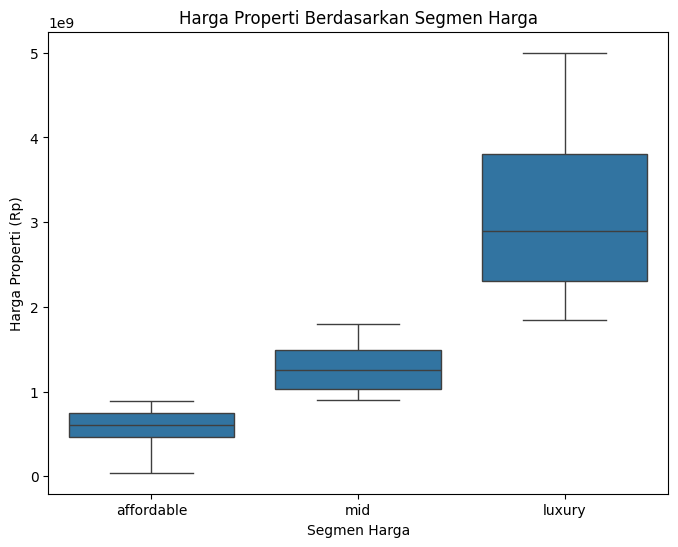

In [305]:
# Boxplot for 'Price' (Harga) by 'Price Segment' (Segmen Harga)
plt.figure(figsize=(8, 6))
sns.boxplot(x='price_segment', y='price_in_rp', data=df)
plt.title('Harga Properti Berdasarkan Segmen Harga')
plt.xlabel('Segmen Harga')
plt.ylabel('Harga Properti (Rp)')
plt.show()

###  Key Insights:

1. Klasifikasi harga terlihat jelas

   * Segmen affordable berada di bawah Rp 1 miliar dengan median sekitar Rp 600 juta.
   * Segmen mid berada di kisaran Rp 1–1,8 miliar dengan median sekitar Rp 1,3 miliar.
   * Segmen luxury memiliki rentang jauh lebih lebar, mulai Rp 2 miliar hingga di atas Rp 5 miliar dengan median hampir Rp 3 miliar.

2. Variasi harga terbesar ada di segmen luxury

   * Boxplot segmen luxury lebih panjang (rentang interkuartil lebar). Maka menunjukkan variasi harga properti mewah sangat besar.
   * Hal ini wajar karena faktor lokasi, luas tanah, dan fasilitas di segmen mewah bisa sangat bervariasi.

3. Distribusi harga lebih stabil pada segmen affordable dan mid

   * Kedua segmen ini memiliki boxplot yang lebih rapat, artinya harga relatif konsisten.
   * Outlier lebih sedikit dibandingkan dengan segmen luxury.

Kesimpulan:

Harga properti di Jabodetabek memang sudah bisa dikelompokkan dengan baik ke dalam tiga segmen. Segmen affordable dan mid relatif stabil, sedangkan luxury menunjukkan variasi besar karena faktor premium (lokasi elit, ukuran besar, fasilitas lengkap).


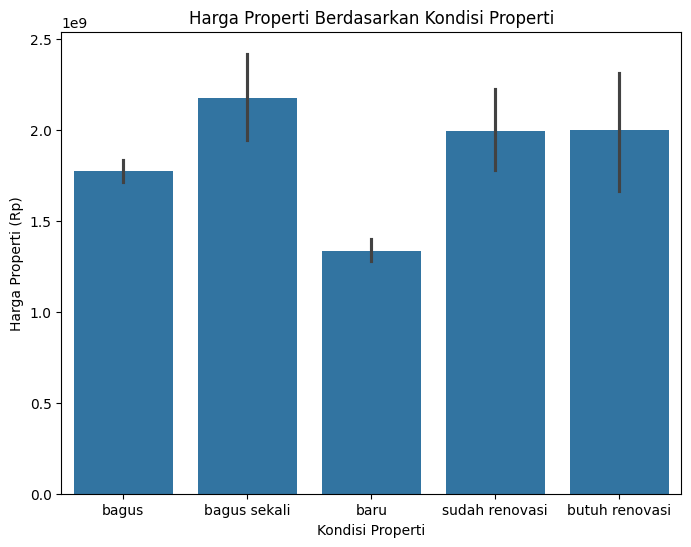

In [306]:
# Barplot for 'Price' by 'Property Condition'
plt.figure(figsize=(8, 6))
sns.barplot(x='property_condition', y='price_in_rp', data=df)
plt.title('Harga Properti Berdasarkan Kondisi Properti')
plt.xlabel('Kondisi Properti')
plt.ylabel('Harga Properti (Rp)')
plt.show()

### Key Insights:

1. Properti dengan kondisi “bagus sekali” memiliki harga rata-rata tertinggi. Harga rata-rata mencapai sekitar Rp 2,2 miliar. Menunjukkan bahwa kualitas kondisi properti sangat berpengaruh terhadap harga jual.

2. Properti baru justru memiliki rata-rata harga lebih rendah (Rp 1,3 miliar) dibandingkan kategori lain. Hal ini bisa jadi karena banyak properti baru yang berada di lokasi pinggiran atau berukuran lebih kecil, sehingga harga jualnya lebih rendah.

3. Properti butuh renovasi dan sudah renovasi masih memiliki rata-rata harga cukup tinggi (Rp 2 miliar). Indikasi bahwa lokasi atau ukuran properti bisa lebih berpengaruh dibanding kondisi fisik semata. Bisa juga menandakan bahwa rumah di lokasi strategis tetap mahal meskipun butuh renovasi.

4. Properti dengan kondisi bagus ada di posisi menengah (Rp 1,8 miliar), lebih tinggi dari baru tapi di bawah bagus sekali.

Kesimpulan:

Kondisi properti memang memengaruhi harga, tetapi tidak sepenuhnya linier. Bagus sekali memberi premium harga, sementara baru justru lebih murah, menandakan faktor lain seperti lokasi dan luas tanah lebih dominan dalam menentukan harga.


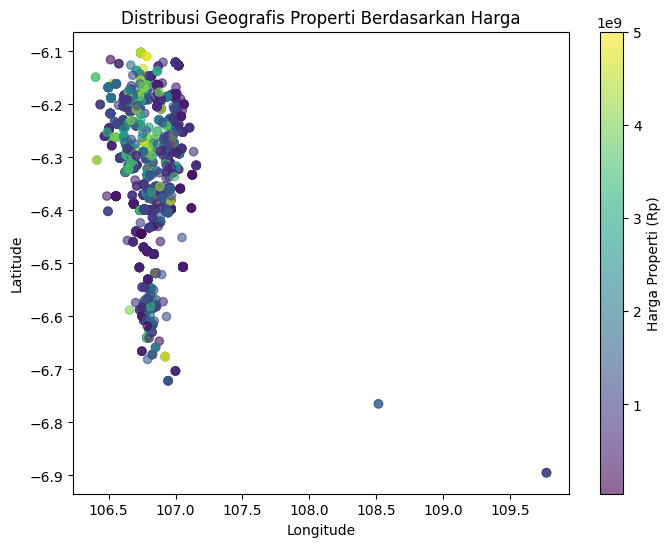

In [307]:
# Scatter plot properti berdasarkan koordinat geografis
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    df["long"], df["lat"],
    c=df["price_in_rp"], cmap="viridis", alpha=0.6
)
plt.colorbar(scatter, label="Harga Properti (Rp)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Distribusi Geografis Properti Berdasarkan Harga")
plt.show()




###  Key Insights:

1. Konsentrasi properti terlihat sangat padat di kisaran longitude 106.5 – 107.5 dan latitude -6.1 sampai -6.7, yang merupakan wilayah inti Jabodetabek (Jakarta dan sekitarnya). Dimana ini menunjukkan pusat aktivitas properti berada di kawasan inti metropolitan.

2. Harga properti mahal  cenderung lebih terkonsentrasi di area tertentu (kemungkinan wilayah Jakarta pusat atau Jakarta Selatan). Ini mengindikasikan adanya klaster harga tinggi di wilayah premium.

3. Properti di luar pusat sebaran misalnya titik di longitude >108 jumlahnya sedikit dan harga cenderung lebih rendah. Bisa jadi itu merupakan outlier atau listing dari daerah luar Jabodetabek.

4. Semakin ke pusat kota, harga cenderung lebih tinggi; semakin ke luar, harga lebih rendah.

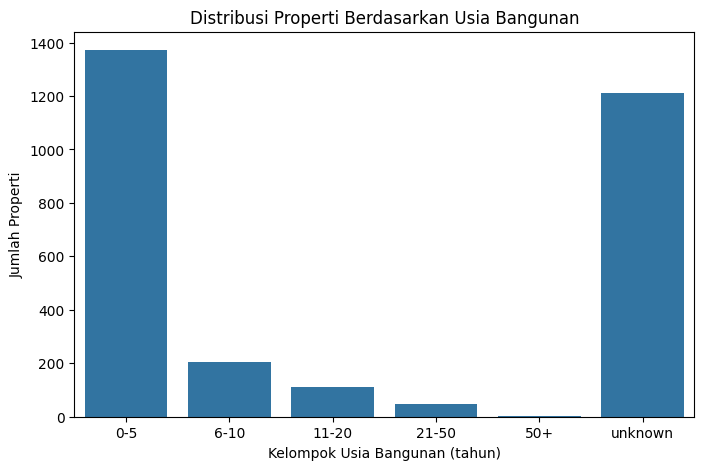

In [308]:
# Barplot distribusi age_bucket
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="age_bucket", order=["0-5","6-10","11-20","21-50","50+","unknown"])
plt.title("Distribusi Properti Berdasarkan Usia Bangunan")
plt.xlabel("Kelompok Usia Bangunan (tahun)")
plt.ylabel("Jumlah Properti")
plt.show()


## Key Insights:

1. Mayoritas properti sangat baru
   Kelompok 0–5 tahun mendominasi jumlah properti. Artinya, sebagian besar properti dalam dataset adalah bangunan baru atau relatif baru, yang biasanya lebih menarik bagi pembeli/investor karena membutuhkan sedikit renovasi.

2. Banyak data usia yang tidak diketahui Kategori unknown juga besar sekali. Ini menunjukkan bahwa informasi usia bangunan sering kali tidak dicantumkan dalam iklan/listing properti. Hal ini penting karena bisa memengaruhi kualitas analisis lebih lanjut (misalnya analisis hubungan usia dengan harga).

3. Bangunan tua jarang Properti dengan usia >20 tahun jumlahnya sangat sedikit, terutama pada kategori 50+ tahun. Hal ini bisa berarti:

   * Properti lama cenderung sudah direnovasi/dihapus datanya.
   * Pasar lebih didominasi oleh bangunan baru.

Kesimpulan:

Dataset memperlihatkan dominasi bangunan baru (0–5 tahun), banyaknya data usia yang hilang, dan sedikitnya properti tua. Untuk analisis prediktif, variabel usia bangunan tetap penting, tetapi perlu dipertimbangkan cara menangani kategori unknown.



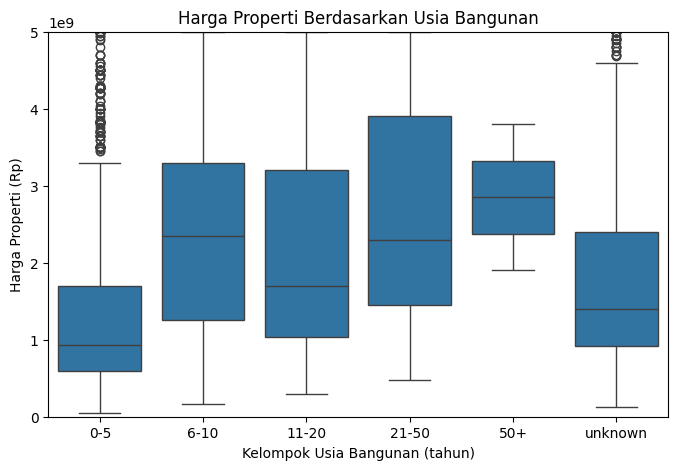

In [309]:
#  Boxplot harga berdasarkan age_bucket
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="age_bucket", y="price_in_rp",
            order=["0-5","6-10","11-20","21-50","50+","unknown"])
plt.title("Harga Properti Berdasarkan Usia Bangunan")
plt.xlabel("Kelompok Usia Bangunan (tahun)")
plt.ylabel("Harga Properti (Rp)")
plt.ylim(0, 5e9)  # batasi biar outlier ekstrem tidak mendominasi
plt.show()


###  Key Insights:

1. Properti baru (0–5 tahun)

   * Median harga relatif lebih rendah dibandingkan kategori usia yang lebih tua.
   * Banyak outlier harga tinggi, menandakan adanya cluster perumahan baru murah, tetapi beberapa properti baru premium harganya bisa melompat tinggi.

2. Properti menengah (6–20 tahun)

   * Median harga lebih tinggi dibandingkan kategori 0–5 tahun.
   * Variasi harga lebih besar, menandakan kondisi bangunan dan lokasi sangat berperan pada harga.

3. Properti tua 21–50 tahun & 50

   * Menariknya, median harga properti 50+ tahun cukup tinggi, bahkan lebih tinggi dari beberapa kategori usia muda.
   * Hal ini menunjukkan bahwa faktor lokasi (bukan hanya usia) sangat menentukan harga. Rumah lama di lokasi strategis tetap bernilai tinggi.
4. Kategori unknown (40% data)

    * Median harga ada di level menengah, distribusinya sangat lebar (mulai dari yang murah hingga luxury).

Kesimpulan

* Harga properti tidak hanya ditentukan oleh usia bangunan, tapi lebih banyak dipengaruhi faktor lain seperti lokasi dan kondisi properti.
* Usia tua tidak selalu berarti harga lebih rendah; properti lama di lokasi premium bisa bernilai tinggi.
* Kategori unknown perlu dianalisis lebih lanjut, karena menampung variasi harga yang luas.